# Loan Application Status Prediction
## Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
### Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
#### You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 
## Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Internship\\Evaluation Projects\\Second Phase\\Loan Prediction\\loan_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# checking rows and columns in dataset
df.shape

(614, 13)

- There are total 614 rows and 13 columns in dataset
- Out of 13 columns, 12 columns are features and 1 is target variable; Loan_Status

In [9]:
# checking all column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# checking datatypes of each column
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Out of 13 columns, there are:
- 8 columns of object datatype
- 4 columns of float64 (numeric) data type
- and 1 column of int64(numeric) data type

In [7]:
# checking more info about dataset at a glance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- There are some missing/null values in a few columns in the dataset; we will check them in detail going forward
- Out of 13 columns, there are:

8 columns of object datatype
4 columns of float64 (numeric) data type
and 1 column of int64(numeric) data type

- The data in the columns match their datatype

In [8]:
# checking null values further
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Gender column has 13 missing values
- Married column has 3 missing values
- Dependednts column has 15 missing values
- Self_Employed has 32 missing values
- LoanAmount has 22 missing values
- Loan_Amount_Term  has 14 missing values
- Credit_History has 50 missing values
- remaining columns; Loan_ID, Education, ApplicantIncome,CoapplicantIncome,Property_Area, Loan_Status  have no missing/null values

In [11]:
# checking statistical summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


- LoanAmount has 22 missing values & Credit_History has 50 missing values
- ApplicantIncome is positively skewed (right tailed) as mean > median - seems to be having outliers
- CoapplicantIncome is positively skewed (right tailed) as mean > median - seems to be having outliers
- LoanAmount is positively skewed (right tailed) as mean > median
- Loan_Amount_Term is mildly negatively skewed (left tailed) as mean< median


# Data Visualization

### Plotting the countplot of categorical (non-numeric) columns

Count Plot for  Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
LP001002    0.001629
LP002328    0.001629
LP002305    0.001629
LP002308    0.001629
LP002314    0.001629
              ...   
LP001692    0.001629
LP001693    0.001629
LP001698    0.001629
LP001699    0.001629
LP002990    0.001629
Name: Loan_ID, Length: 614, dtype: float64


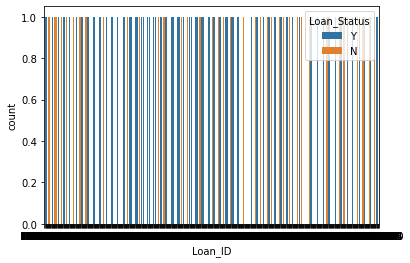

Count Plot for  Gender
Male      489
Female    112
Name: Gender, dtype: int64
Male      0.813644
Female    0.186356
Name: Gender, dtype: float64


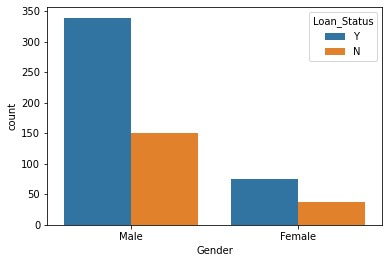

Count Plot for  Married
Yes    398
No     213
Name: Married, dtype: int64
Yes    0.651391
No     0.348609
Name: Married, dtype: float64


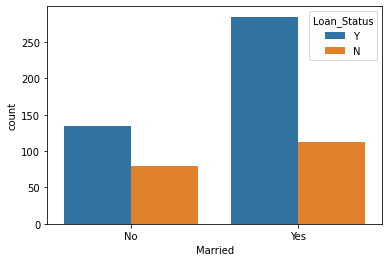

Count Plot for  Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64


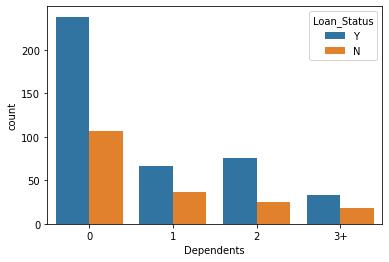

Count Plot for  Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64


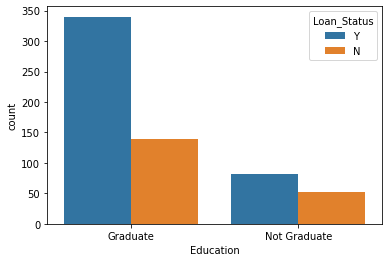

Count Plot for  Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64


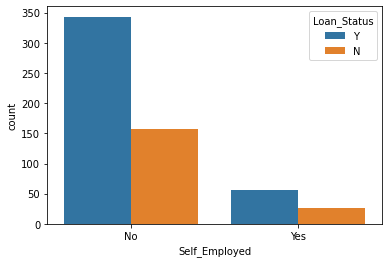

Count Plot for  ApplicantIncome
Count Plot for  CoapplicantIncome
Count Plot for  LoanAmount
Count Plot for  Loan_Amount_Term
Count Plot for  Credit_History
Count Plot for  Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64


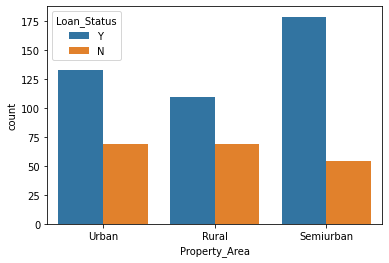

Count Plot for  Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


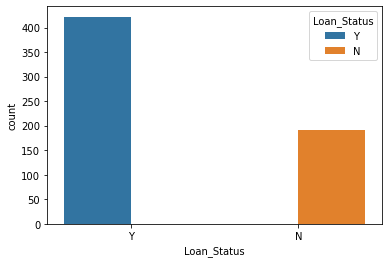

In [12]:
for i in df.columns:
    print('Count Plot for ', i)
    if df[i].dtypes=='object':
        sns.countplot(x=df[i], hue=df['Loan_Status'])
        print(df[i].value_counts())
        print(df[i].value_counts(normalize=True))
        plt.show()
        

- Loan_ID is an Unique Identifier columns
- More males get loan status approved than females
- More married couples get loan status approved than unmarried
- More people with zero dependents get their loans approved probably because of less liability
- More graduates get loan approved than non-graduate as education provides better job opportunities and better salaries
- the ones who are not self employed get more approved loans
- Semi urban gets most loan status approved followed  by urban and rural

### Ploting Dist plot for the Numerical columns

Distribution Plot for  Loan_ID
Distribution Plot for  Gender
Distribution Plot for  Married
Distribution Plot for  Dependents
Distribution Plot for  Education
Distribution Plot for  Self_Employed
Distribution Plot for  ApplicantIncome


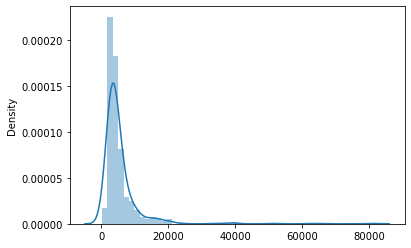

Distribution Plot for  CoapplicantIncome


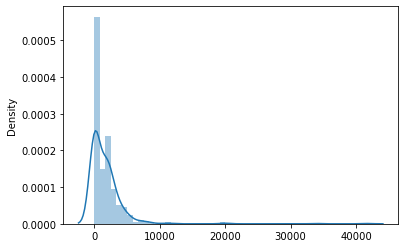

Distribution Plot for  LoanAmount


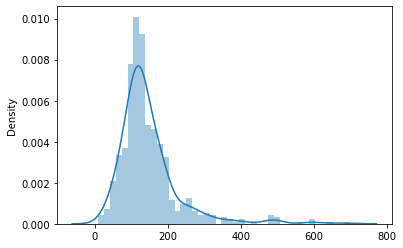

Distribution Plot for  Loan_Amount_Term


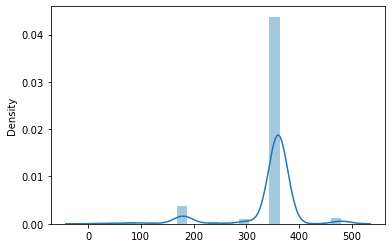

Distribution Plot for  Credit_History


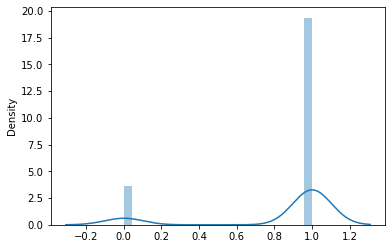

Distribution Plot for  Property_Area
Distribution Plot for  Loan_Status


In [13]:

for i in df.columns:
    print('Distribution Plot for ', i)
    if df[i].dtypes!='object':
        sns.distplot(x=df[i],kde=True)
        plt.show()

- ApplicantIncome, CoapplicantIncome, LoanAmount are rightly skewed
- Loan_Amount_Term is only having 4 unique values and have to fill with mode for null values
- Credit_History shows that most (nearly 85%) of the applicants have repayed their debts 

In [15]:
# checking skew score
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

- skewness in the columns will be dealt wth later 

<AxesSubplot:>

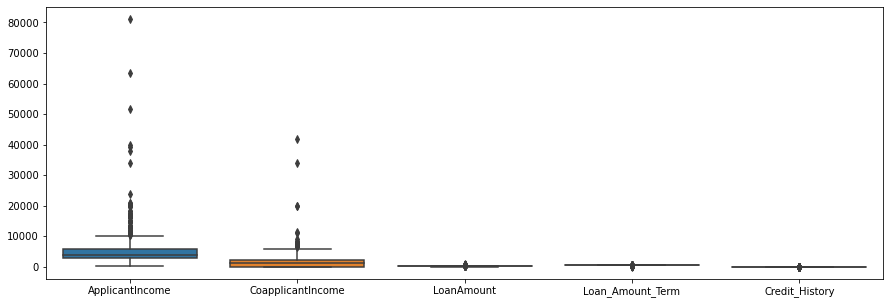

In [14]:
# Checking for Outliers
plt.figure(figsize=(15,5))
sns.boxplot(data=df)

- ApplicantIncome, CoapplicantIncome have outliers as evident from the boxplot

In [ ]:
# Let's check the correlation between the features and target variable.
# But before that let's treat the missing values and use Encoder to convert non-numeric fields to numeric datatype

In [17]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:

# Filling na values in Gender column with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# Filling na values in Married column with mode
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

# Filling na values in Dependents column with mode
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

# Filling na values in Self_Employed column with mode
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


# Filling na values in LoanAmount column with mode 
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# Filling na values in Credit_History   column with mode
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

# Filling na values in Loan_Amount  column with median as it has some outliers so mean wouldnt be the right value to use here
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [21]:
# Checking if null values are still there
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- The null values have been treated. There are no missing/null values in the dataset now.

In [22]:
# Now let us encode the categorical columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [23]:
# checking the data type of columns 

df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

- All the categorical columns have been converted to numeric data type

<AxesSubplot:>

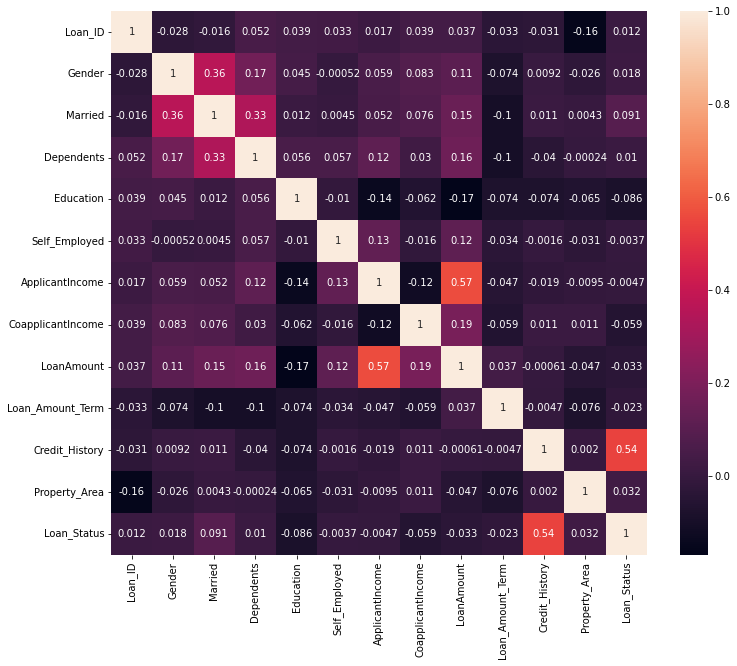

In [26]:
# Now lets plot heatmap to check correlation

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

- Here, we see that target variable 'Loan_Status' is highly correlated with 'Credit_history'
- The features that are correlated with each other are: 'ApplicantIncome' & 'LoanAmount'

# Pre-processing Data

In [30]:
# We can drop Loan_ID column from data as it is not contrIibuting any relavant information

df=df.drop(['Loan_ID'], axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [31]:
# Treating outliers with z-score method

from scipy.stats import zscore

z = np.abs(zscore(df))
z.shape

(614, 12)

In [32]:
# setting threshold as 3
threshold = 3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [33]:
# Removing the outlier 
df=df[(z<3).all(axis=1)]
df.shape

(577, 12)

In [34]:
#data loss
loss=(614-577)/577*100
loss

6.412478336221837

- As data loss is only 6% therefore we can drop the outliers

In [35]:
# Splitting dataset into features and target variable

x = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']
print("shape of x is: ", x.shape)
print("shape of y is: ", y.shape)


shape of x is:  (577, 11)
shape of y is:  (577,)


In [37]:
# Removing Skewness Using Power Transform
from sklearn.preprocessing import power_transform
X=power_transform(x, method='yeo-johnson')
X

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.13078824,
        -2.38941464,  0.01546372]])

In [39]:
#checking for skewness is removed or not
skew_df=pd.DataFrame(X)
skew_df.skew()

0    -1.622920
1    -0.630211
2     0.478360
3     1.306588
4     2.252848
5     0.027981
6    -0.191876
7     0.048425
8     0.727533
9    -1.976043
10   -0.155094
dtype: float64

- the skewness has reduced and is in the desirable range

In [40]:
# Standardising the feature data

#importing the StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
X

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.13078824,
        -2.38941464,  0.01546372]])

In [41]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [42]:
# Let's balance the target variable using SMOTE()

# Importing Libraries for it 
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,Y=sm.fit_resample(X,y)
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

- The data looks balanced now

# MOdel Building

In [45]:
# Splitting data into training and testing subsets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
lg = LogisticRegression()

In [ ]:
#Finding the random state

maxaccu=0
maxrs=0
for i in range(1,100):
    print("At Random State ", i)
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=.20, random_state=i)
    lg.fit(Xtrain,Ytrain)
    predlg=lg.predict(Xtest)
    trainlg=lg.predict(Xtrain)
    acc=accuracy_score(Ytest,predlg)
    accu=accuracy_score(Ytrain,trainlg)
    print('testing accuracy', acc, 'randon state',i)
    print('Training Accuracy', accu, 'random state', i)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
        print('max accuracy', maxaccu , 'max_random_state', i)

In [48]:
# Checking for the Max. Accuracy at Random State
print('max accuracy', maxaccu , 'max_random_state', i)

max accuracy 0.825 max_random_state 99


Using random state = 99 for the test train data split

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 99)

In [58]:
print("Shape of X_train is :", X_train.shape)
print("Shape of X_test is :", X_test.shape)
print("Shape of Y_train is :", Y_train.shape)
print("Shape of Y_test is :", Y_test.shape)


Shape of X_train is : (636, 11)
Shape of X_test is : (160, 11)
Shape of Y_train is : (636,)
Shape of Y_test is : (160,)


# 1. Logistic Regression

In [59]:
lg = LogisticRegression()
lg.fit(X_train, Y_train)
Y_pred_train_lg = lg.predict(X_train)
Y_pred_test_lg = lg.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_lg))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_lg))
print(confusion_matrix(Y_test, Y_pred_test_lg))
print(classification_report(Y_test, Y_pred_test_lg))

Training accuracy is:  0.7484276729559748
Testing accuracy is:  0.71875
[[45 35]
 [10 70]]
              precision    recall  f1-score   support

           0       0.82      0.56      0.67        80
           1       0.67      0.88      0.76        80

    accuracy                           0.72       160
   macro avg       0.74      0.72      0.71       160
weighted avg       0.74      0.72      0.71       160



In [60]:
#AUC ROC Curve
# Importing libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

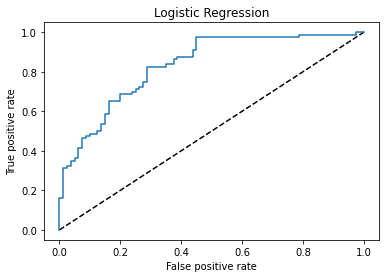

0.71875

In [61]:
#AUC ROC curve for Logistic regression
Y_pred_prob=lg.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Linear Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

auc_score=roc_auc_score(Y_test,lg.predict(X_test))

auc_score

# 2. Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
Y_pred_train_dtc = dtc.predict(X_train)
Y_pred_test_dtc = dtc.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_dtc))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_dtc))
print(confusion_matrix(Y_test, Y_pred_test_dtc))
print(classification_report(Y_test, Y_pred_test_dtc))

Training accuracy is:  1.0
Testing accuracy is:  0.80625
[[63 17]
 [14 66]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        80
           1       0.80      0.82      0.81        80

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.81      0.81      0.81       160



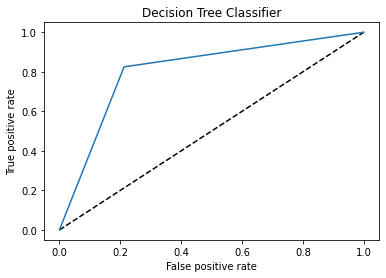

0.8062499999999999

In [63]:
#AUC ROC curve for Decision Tree Classifier
Y_pred_prob=dtc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,dtc.predict(X_test))

auc_score

# 3. Random Forest Classifier

In [64]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred_train_rf = rf.predict(X_train)
Y_pred_test_rf = rf.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_rf))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_rf))
print(confusion_matrix(Y_test, Y_pred_test_rf))
print(classification_report(Y_test, Y_pred_test_rf))

Training accuracy is:  1.0
Testing accuracy is:  0.84375
[[61 19]
 [ 6 74]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83        80
           1       0.80      0.93      0.86        80

    accuracy                           0.84       160
   macro avg       0.85      0.84      0.84       160
weighted avg       0.85      0.84      0.84       160



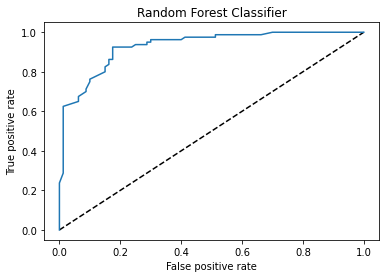

0.84375

In [65]:
#AUC ROC curve for Random Forest Classifier Classifier
Y_pred_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,rf.predict(X_test))

auc_score

# 4. SVC

In [66]:
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,Y_train)
Y_pred_train_svc = svc.predict(X_train)
Y_pred_test_svc = svc.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_svc))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_svc))
print(confusion_matrix(Y_test, Y_pred_test_svc))
print(classification_report(Y_test, Y_pred_test_svc))

Training accuracy is:  0.8160377358490566
Testing accuracy is:  0.8
[[54 26]
 [ 6 74]]
              precision    recall  f1-score   support

           0       0.90      0.68      0.77        80
           1       0.74      0.93      0.82        80

    accuracy                           0.80       160
   macro avg       0.82      0.80      0.80       160
weighted avg       0.82      0.80      0.80       160



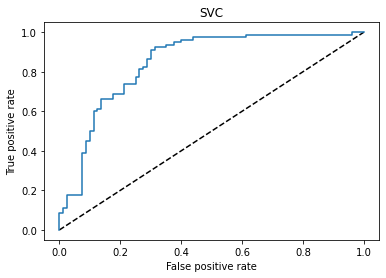

0.8

In [67]:
#AUC ROC curve for  SVC
Y_pred_prob=svc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVC')
plt.show()

auc_score=roc_auc_score(Y_test,svc.predict(X_test))

auc_score

# 5. KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred_train_knn = knn.predict(X_train)
Y_pred_test_knn = knn.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_knn))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_knn))
print(confusion_matrix(Y_test, Y_pred_test_knn))
print(classification_report(Y_test, Y_pred_test_knn))

Training accuracy is:  0.8380503144654088
Testing accuracy is:  0.7625
[[60 20]
 [18 62]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        80
           1       0.76      0.78      0.77        80

    accuracy                           0.76       160
   macro avg       0.76      0.76      0.76       160
weighted avg       0.76      0.76      0.76       160



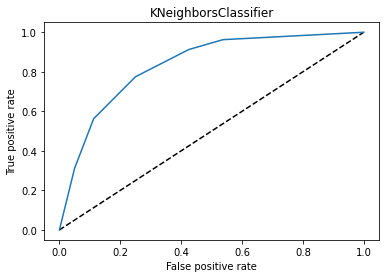

0.7625

In [70]:
#AUC ROC curve for  KNeighborsClassifier
Y_pred_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,knn.predict(X_test))

auc_score

# 6. Gradient Boosting Classifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
Y_pred_train_gbc = gbc.predict(X_train)
Y_pred_test_gbc = gbc.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_gbc))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_gbc))
print(confusion_matrix(Y_test, Y_pred_test_gbc))
print(classification_report(Y_test, Y_pred_test_gbc))

Training accuracy is:  0.9072327044025157
Testing accuracy is:  0.84375
[[60 20]
 [ 5 75]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        80
           1       0.79      0.94      0.86        80

    accuracy                           0.84       160
   macro avg       0.86      0.84      0.84       160
weighted avg       0.86      0.84      0.84       160



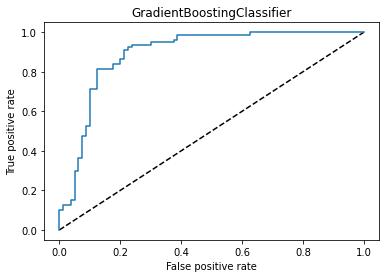

0.84375

In [78]:
#AUC ROC curve for  GradientBoostingClassifier
Y_pred_prob=gbc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,gbc.predict(X_test))

auc_score

# 7. AdaBoosting Classifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
Y_pred_train_ada = ada.predict(X_train)
Y_pred_test_ada = ada.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_ada))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_ada))
print(confusion_matrix(Y_test, Y_pred_test_ada))
print(classification_report(Y_test, Y_pred_test_ada))

Training accuracy is:  0.8301886792452831
Testing accuracy is:  0.8125
[[59 21]
 [ 9 71]]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        80
           1       0.77      0.89      0.83        80

    accuracy                           0.81       160
   macro avg       0.82      0.81      0.81       160
weighted avg       0.82      0.81      0.81       160



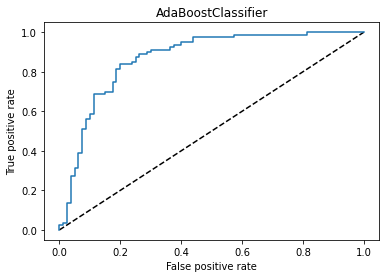

0.8125

In [75]:
#AUC ROC curve for  AdaBoostClassifier
Y_pred_prob=ada.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoostClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,ada.predict(X_test))

auc_score

# Cross-validation

In [79]:
from sklearn.model_selection import cross_val_score

# validation accuracy

model=[lg,dtc,rf,svc, knn,gbc,ada]

for i in model:
    for j in range(2,10):
        print('taking cv =', j)
        cr_score=cross_val_score(i, X, Y, cv=j)
        print('Cross validation score for ' , i ,' is', cr_score)
        print('Mean of Cross Val. score is ', cr_score.mean())

taking cv = 2
Cross validation score for  LogisticRegression()  is [0.74874372 0.74874372]
Mean of Cross Val. score is  0.7487437185929648
taking cv = 3
Cross validation score for  LogisticRegression()  is [0.73308271 0.75849057 0.71698113]
Mean of Cross Val. score is  0.7361848016267083
taking cv = 4
Cross validation score for  LogisticRegression()  is [0.70854271 0.77386935 0.77889447 0.69346734]
Mean of Cross Val. score is  0.7386934673366834
taking cv = 5
Cross validation score for  LogisticRegression()  is [0.69375    0.75471698 0.81132075 0.72327044 0.70440252]
Mean of Cross Val. score is  0.7374921383647799
taking cv = 6
Cross validation score for  LogisticRegression()  is [0.72180451 0.73684211 0.72932331 0.78947368 0.72727273 0.71969697]
Mean of Cross Val. score is  0.7374022176653757
taking cv = 7
Cross validation score for  LogisticRegression()  is [0.73684211 0.71052632 0.75438596 0.78070175 0.77192982 0.7079646
 0.72566372]
Mean of Cross Val. score is  0.7411448976423359
t

## Observation Made from abovelassifier models:


- The Random Forest Classifier is giving the accuracy 84.37% with cross val score as 84.581% at fold 9 compared with all other classifiers
- Hence selecting the RandomForestClassifier giving almost 85% model accuracy.

# Hyperparameter Tuning

In [81]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to be passed in GridSearchCV
parameters = {
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt','log2'],
 'n_estimators': [100, 200, 300]
    
} 

GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=7,
                scoring='accuracy')

In [82]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [83]:
GCV.best_params_

{'max_depth': 50, 'max_features': 'auto', 'n_estimators': 100}

In [84]:
# Checking score with best parameter
final_model=RandomForestClassifier(max_depth=40,max_features='log2',n_estimators=200)
final_model.fit(X_train,Y_train)
predfinal=final_model.predict(X_test)
print('Final Accuracy is with Random Forest Classifier = ',accuracy_score(Y_test,predfinal))

Final Accuracy is with Random Forest Classifier =  0.84375


<function matplotlib.pyplot.show(close=None, block=None)>

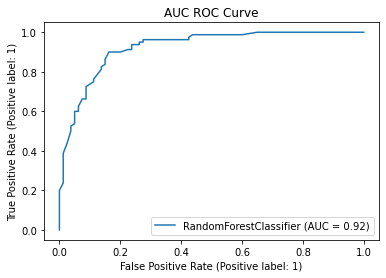

In [85]:
#AUC ROC of Best Estimator
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,Y_test)
plt.title('AUC ROC Curve')
plt.show

# Saving the model

In [86]:
import joblib
joblib.dump(GCV.best_estimator_, "Loan Application Status Prediction.pkl")

['Loan Application Status Prediction.pkl']

In [87]:
# Conclusion
a=np.array(Y_test)
predicted=np.array(predfinal)
df_con=pd.DataFrame({'Original':a,'Predicted':predicted}, index=range(len(a)))
df_con

,Original,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
155,1,1
156,1,1
157,1,1
158,0,0


As we can see that after the Hyper parameter tunning the final model accuracy that we have got is 84.375% which is considerably good hence we can say that the model is performing well

# THE END